In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
mice_count=combined_data["Mouse ID"].unique()
mice_total=len(mice_count)
mice_total

249

In [55]:
mice_dupes = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [56]:
clean_data=combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:

drug_data=combined_data.groupby("Drug Regimen")
drug_mean=drug_data["Tumor Volume (mm3)"].mean()
drug_median=drug_data["Tumor Volume (mm3)"].median()
drug_var=drug_data["Tumor Volume (mm3)"].var()
drug_std=drug_data["Tumor Volume (mm3)"].std()
drug_sem=drug_data["Tumor Volume (mm3)"].sem()

drug_data_df=pd.DataFrame({"Mean Tumor Volume" : drug_mean,
                            "Median Tumor Volume" : drug_median,
                          "Tumor Volume Var." : drug_var,
                          "Tumor Standard Dev." : drug_std,
                          "Tumor Standard Error" : drug_sem})
drug_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Var.,Tumor Standard Dev.,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


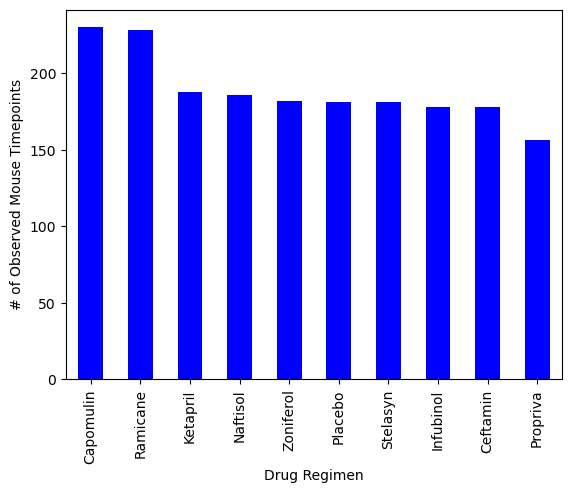

In [58]:


mice_pandas_bar = clean_data[["Drug Regimen","Timepoint"]]

mice_bar_plot = mice_pandas_bar["Drug Regimen"].value_counts()
mice_bar_plot

mice_bar_plot.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="# of Observed Mouse Timepoints")

plt.show()

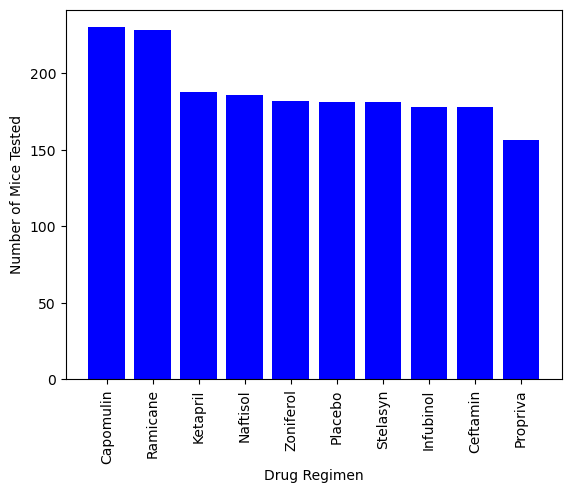

In [62]:

drugs = mice_bar_plot.index.values
count = mice_bar_plot.values

plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

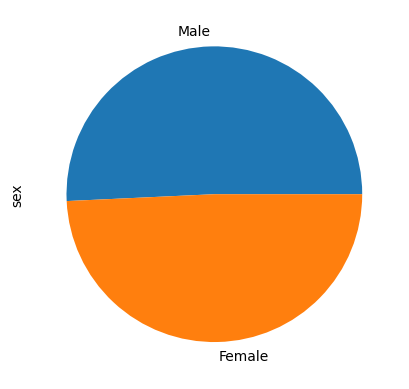

In [70]:
mice_pandas_pie = clean_data["Sex"].value_counts()

mice_pandas_pie.plot(kind="pie", ylabel="sex")
plt.show()

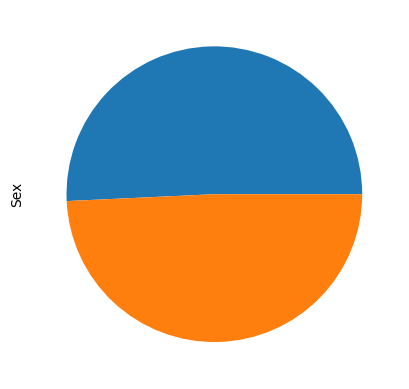

In [71]:
pi_label = mice_pandas_pie.index.values
count_value = mice_pandas_pie.values
plt.ylabel("Sex")
plt.pie(count_value)
plt.show()

In [21]:

reduced_drug_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") |
                                        (clean_data["Drug Regimen"] == "Infubinol") |(clean_data["Drug Regimen"] == "Ceftamin") ]


last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()

reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})
new_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN


In [22]:

treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment



tum_vol = []
upperq_list = []
lowerq_list = []


for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
 
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list

lower_bound = lowerq - (1.5*drug_iqr)
upper_bound = upperq + (1.5*drug_iqr)


iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


Text(0.5, 0, '')

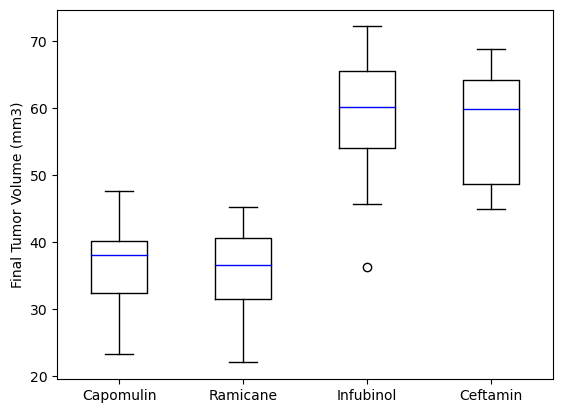

In [23]:

boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

In [29]:

capomulin_line = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
capomulin_line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<function matplotlib.pyplot.show(close=None, block=None)>

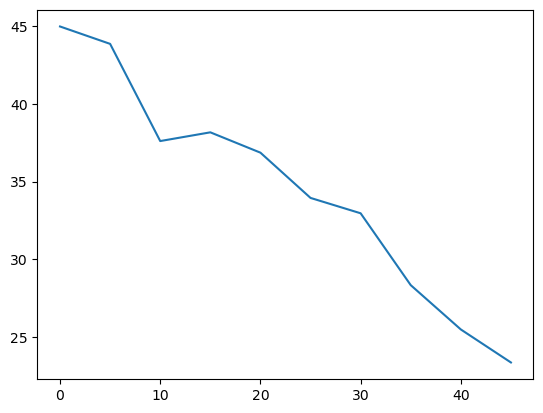

In [30]:
line_x_axis = capomulin_line["Timepoint"]
line_y_axis = capomulin_line["Tumor Volume (mm3)"]

plt.plot (line_x_axis, line_y_axis)
plt.show

In [42]:
caposcatter = capomulin_df.groupby(['Tumor Volume (mm3)']).mean()
plt.scatter(caposcatter["Weight (g)"], caposcatter["Tumor Volume (mm3)"])
plt.show



C:\Users\adamg\AppData\Local\Temp\ipykernel_19888\3827818486.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  caposcatter = capomulin_df.groupby(['Tumor Volume (mm3)']).mean()


KeyError: 'Tumor Volume (mm3)'

In [47]:
reg_x=capomulin_df["Weight (g)"]
reg_y=capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_x, reg_y)
regress_values = reg_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 0.96x + 21.49


<function matplotlib.pyplot.show(close=None, block=None)>

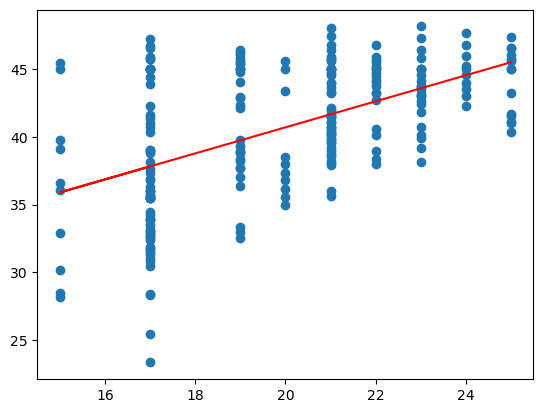

In [48]:
plt.scatter(reg_x, reg_y)
plt.plot(reg_x, regress_values, "r-")
plt.show